Algorithm      Execution Time (s)  
-----------------------------------
Bubble Sort    0.045955            
Merge Sort     0.008579            
Quick Sort     0.000000            


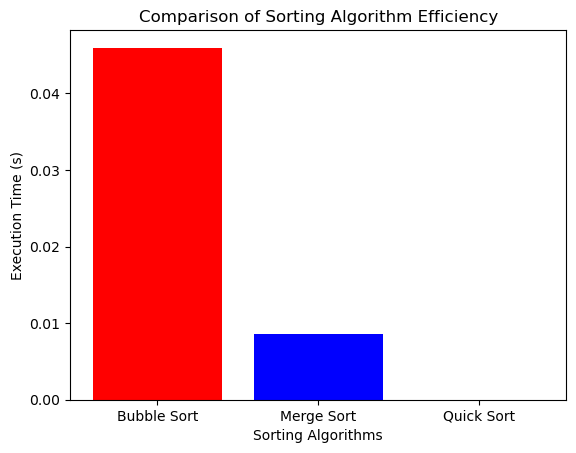

In [1]:
import time
import random
import matplotlib.pyplot as plt

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        
        merge_sort(left)
        merge_sort(right)
        
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
        
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


arr = [random.randint(1, 10000) for _ in range(1000)]

def measure_time(sort_function, arr):
    arr_copy = arr.copy()
    start_time = time.time()
    sort_function(arr_copy)
    return time.time() - start_time

bubble_time = measure_time(bubble_sort, arr)
merge_time = measure_time(merge_sort, arr)
quick_time = measure_time(quick_sort, arr)

print(f"{'Algorithm':<15}{'Execution Time (s)':<20}")
print(f"{'-'*35}")
print(f"{'Bubble Sort':<15}{bubble_time:<20.6f}")
print(f"{'Merge Sort':<15}{merge_time:<20.6f}")
print(f"{'Quick Sort':<15}{quick_time:<20.6f}")

algorithms = ["Bubble Sort", "Merge Sort", "Quick Sort"]
times = [bubble_time, merge_time, quick_time]

plt.bar(algorithms, times, color=['red', 'blue', 'green'])
plt.xlabel("Sorting Algorithms")
plt.ylabel("Execution Time (s)")
plt.title("Comparison of Sorting Algorithm Efficiency")
plt.show()

In [3]:
import time
import functools

def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

def fibonacci_iterative(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

@functools.lru_cache(None)
def fibonacci_memoization(n):
    if n <= 1:
        return n
    return fibonacci_memoization(n-1) + fibonacci_memoization(n-2)

def measure_time(func, n):
    start_time = time.time()
    result = func(n)
    return result, time.time() - start_time

test_values = [10, 20, 30, 40]

results = {n: {} for n in test_values}

for n in test_values:
    for method, func in zip(["Recursive", "Iterative", "Memoization"], 
                            [fibonacci_recursive, fibonacci_iterative, fibonacci_memoization]):
        result, exec_time = measure_time(func, n)
        results[n][method] = {"Result": result, "Time": exec_time}

for n, times in results.items():
    print(f"\nFor n = {n}:")
    for method, data in times.items():
        print(f"{method:<12}: Time = {data['Time']:.6f} sec, Result = {data['Result']}")



For n = 10:
Recursive   : Time = 0.000000 sec, Result = 55
Iterative   : Time = 0.000000 sec, Result = 55
Memoization : Time = 0.000000 sec, Result = 55

For n = 20:
Recursive   : Time = 0.002012 sec, Result = 6765
Iterative   : Time = 0.000000 sec, Result = 6765
Memoization : Time = 0.000000 sec, Result = 6765

For n = 30:
Recursive   : Time = 0.179103 sec, Result = 832040
Iterative   : Time = 0.000000 sec, Result = 832040
Memoization : Time = 0.000000 sec, Result = 832040

For n = 40:
Recursive   : Time = 21.460117 sec, Result = 102334155
Iterative   : Time = 0.000000 sec, Result = 102334155
Memoization : Time = 0.000000 sec, Result = 102334155


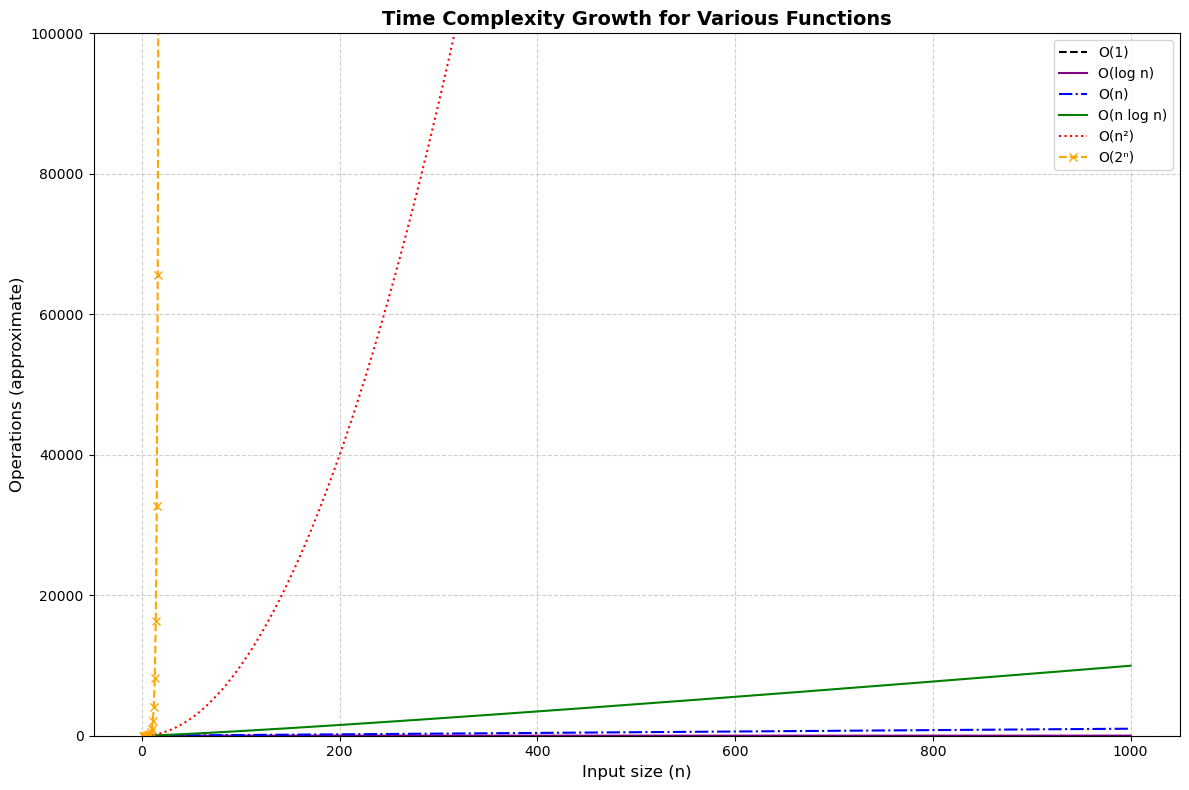

In [5]:
import matplotlib.pyplot as plt
import numpy as np

n_values = np.arange(1, 1001)

constant = np.ones_like(n_values)
log_n = np.log(n_values) 
linear = n_values
n_log_n = n_values * np.log2(n_values)
quadratic = n_values ** 2
exponential = 2 ** n_values[n_values < 30]  

plt.figure(figsize=(12, 8))
plt.plot(n_values, constant, label="O(1)", linestyle='dashed', color='black')
plt.plot(n_values, log_n, label="O(log n)", linestyle='solid', color='purple')
plt.plot(n_values, linear, label="O(n)", linestyle='dashdot', color='blue')
plt.plot(n_values, n_log_n, label="O(n log n)", linestyle='solid', color='green')
plt.plot(n_values, quadratic, label="O(n²)", linestyle='dotted', color='red')
plt.plot(n_values[n_values < 30], exponential, label="O(2ⁿ)", linestyle='--', marker='x', color='orange')


plt.ylim(0, 100000)
plt.title("Time Complexity Growth for Various Functions", fontsize=14, fontweight='bold')
plt.xlabel("Input size (n)", fontsize=12)
plt.ylabel("Operations (approximate)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='dashed', alpha=0.6)
plt.tight_layout()
plt.show()